# Lesson 1: Essential prompting techniques: a recap

## Introduction
Welcome to the first lesson in our "Applied Prompting" course! This course is designed for experienced developers who have already dipped their toes into the world of prompt engineering, particularly those who have completed our comprehensive **[Prompt Engineering Interactive Tutorial](../PromptEngineeringInteractiveTutorial/README.md)**. If you haven't gone through that tutorial yet, we strongly recommend you do so before continuing, as it provides an in-depth exploration of various prompting techniques with hands-on exercises.

In this initial brief lesson, "Essential prompting techniques: a recap," we aim to recap the foundational prompting knowledge that we'll draw from throughout the rest of this course. Our goal with this course is not to rehash the basics but to reinforce these techniques by demonstrating their critical importance in high-stakes, scaled production environments. 

Let's dive in and see how these fundamental techniques can transform the way you interact with Claude in production environments.

## Key prompting tips
In this lesson, we'll cover the following critical prompting tips:

0. [Use the Prompt Generator](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/prompt-generator)
1. [Be clear and direct](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/be-clear-and-direct)
4. [Use XML tags](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/use-xml-tags)
2. [Use examples (multishot prompting)](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/multishot-prompting)
3. [Let Claude think (chain of thought prompting)](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/chain-of-thought)
5. [Give Claude a role (system prompts)](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/system-prompts)
7. [Long context tips](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/long-context-tips)

## 0 Use the Prompt Generator

The easiest way to get started writing effective prompts is to use our new Prompt Generator tool. We've created a tool that can guide Claude to generate high-quality prompts tailored to your specific task. The Prompt Generator is particularly useful as a tool for solving the “blank page problem” and giving you a jumping-off point for testing and iteration that follows some of our best practices like chain of thought and separating data from instructions.

To use it, navigate to the Console and select "Generate a prompt".

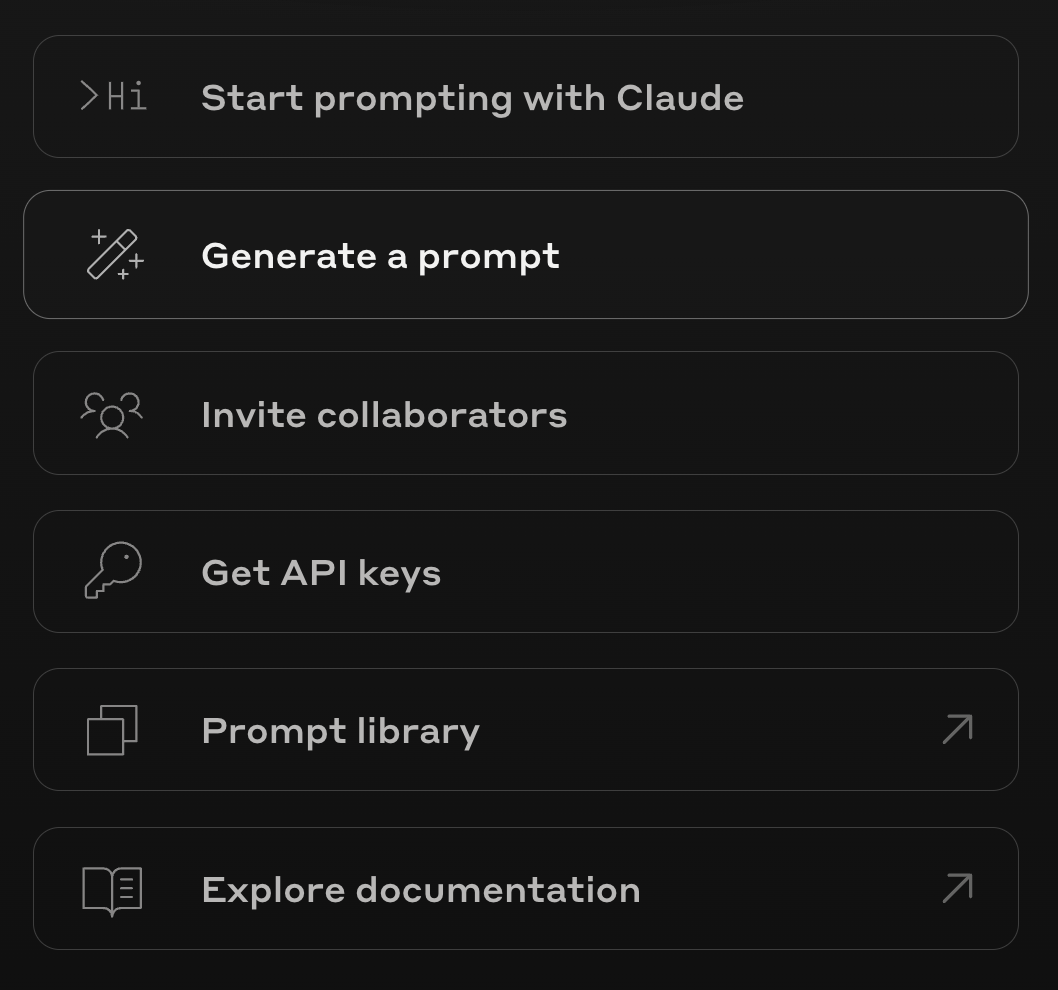

Next, enter your initial idea for your desired prompt. Be as detailed as you'd like - Claude will take all the context you give into consideration when building your prompt. 

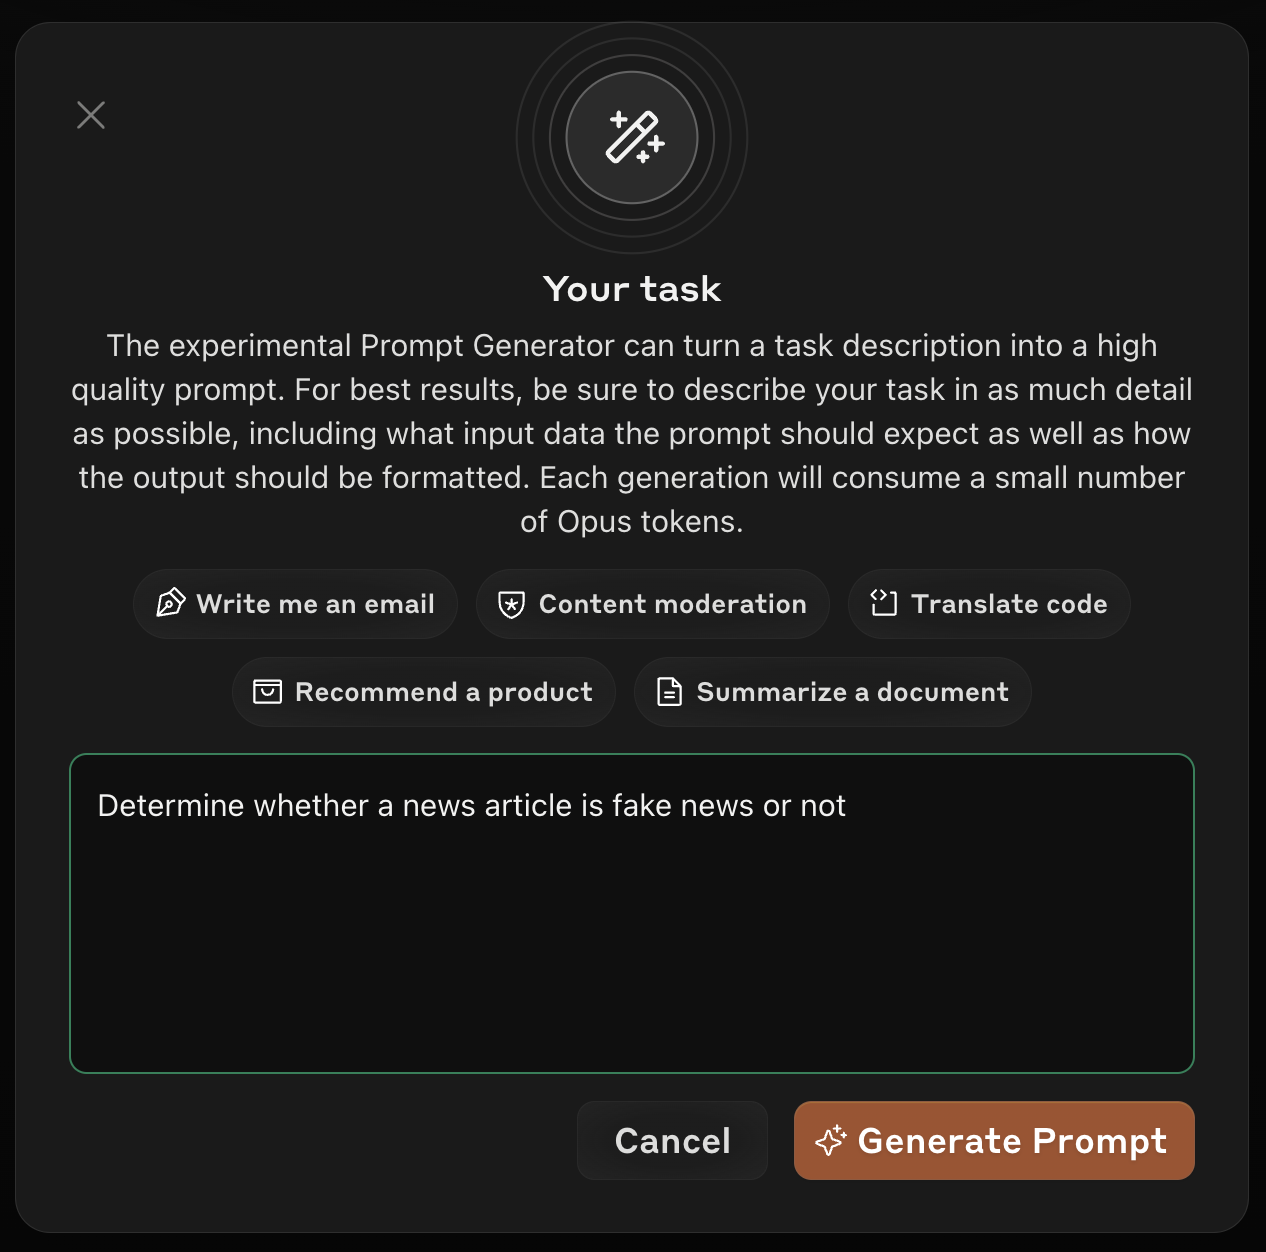

Click "Generate prompt" and wait for Claude to generate you a high-quality prompt like the one below: 

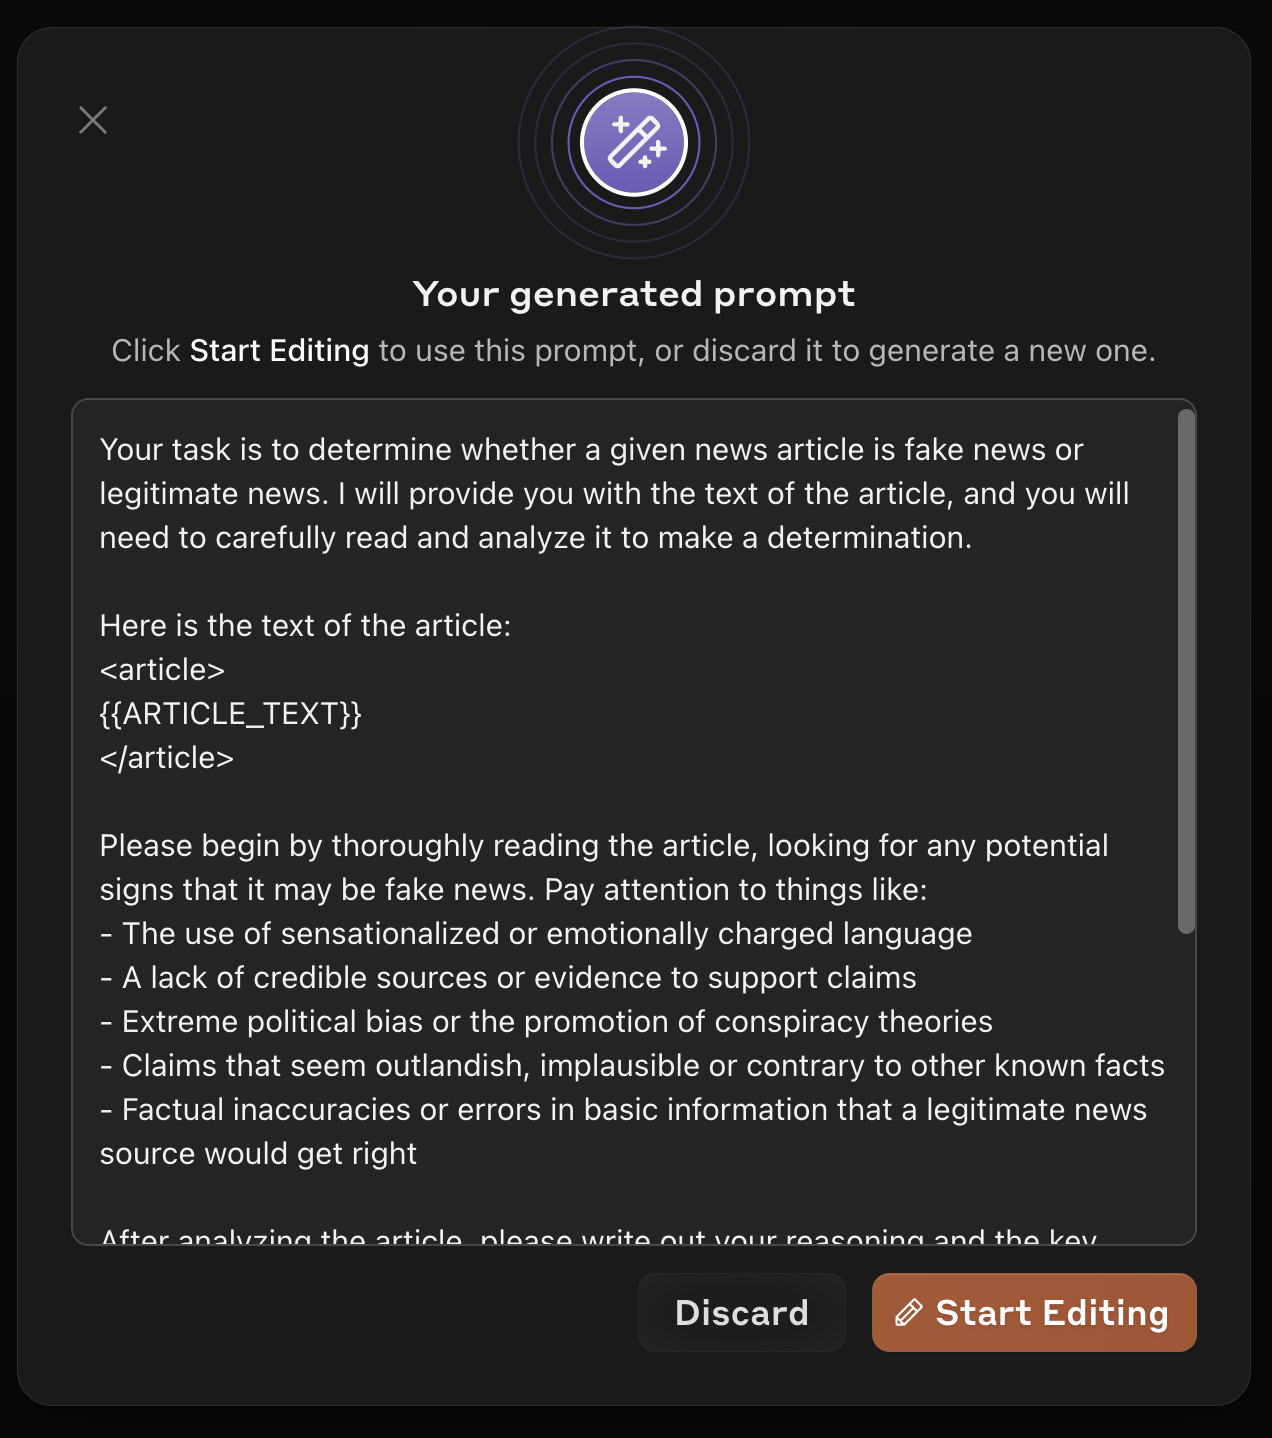

Let's take a closer look at the prompt it generated for us:

| Input Text | Generated Prompt |
|------------|-----------------|
| Determine whether a news article is fake news or not | Your task is to determine whether a given news article is fake news or legitimate news. I will provide you with the text of the article, and you will need to carefully read and analyze it to make a determination. <br/><br/> Here is the text of the article: <br/> \<article> <br/> \{\{ARTICLE_TEXT}} <br/> \</article> <br/> <br/> Please begin by thoroughly reading the article, looking for any potential signs that it may be fake news. Pay attention to things like: <br/> - The use of sensationalized or emotionally charged language <br/> - A lack of credible sources or evidence to support claims <br/> - Extreme political bias or the promotion of conspiracy theories <br/> - Claims that seem outlandish, implausible or contrary to other known facts <br/> - Factual inaccuracies or errors in basic information that a legitimate news source would get right <br/> <br/> After analyzing the article, please write out your reasoning and the key points you noticed in a \<reasoning> section. Explain what specifically in the article led you to believe it may be fake or legitimate. <br/> <br/> Finally, based on your analysis, make a clear determination of whether you believe this article is FAKE news or REAL news. State your final answer in an \<answer> section. <br/> <br/> Remember, fake news can be tricky to spot, so think critically and don't jump to any conclusions before carefully weighing the evidence. If you're not sure, err on the side of caution in your determination. |

This prompt incorporates many of our most important prompt engineering techniques including: 
- A clear and direct task definition
- Instructions for structuring output
- The use of XML tags to clearly break up the prompt

**Note: The prompts created by the prompt generator are best used as a starting point to be iterated upon. It's still very important to understand our key prompting techniques and why they work, as they will help you improve the performance of prompts created by the prompt generator.**

Next, let's recap some of our most important prompt engineering techniques.

## 1\. Be clear and direct

### What it is:
Without a doubt, the most important prompting technique is also the simplest: write explicit, detailed instructions that leave no room for ambiguity. This means specifying desired output formats, lengths, and styles, and not assuming Claude has context about your use case.  It's often easier said than done, but it's worth getting right.

### Why it matters:
Clarity and precision are paramount. Ambiguous or vague prompts can lead to misunderstandings, wasted time, and potentially costly errors. By being clear and direct, you ensure that Claude understands your exact requirements, reducing the need for back-and-forth clarifications and increasing overall prompt effectiveness.

### Bad example: Analyzing customer feedback
Imagine you're a product manager who wants to categorize and summarize customer feedback for a new software release.

| Role | Content                                                                                                  |
| ---- | -------------------------------------------------------------------------------------------------------- |
| User | Here's some customer feedback. Can you tell me what people think? <br/> \{\{CUSTOMER_FEEDBACK}} |

This prompt is vague and lacks specific instructions. Claude might provide a general summary, but it may not include the structured insights you need for decision-making.

### Good example: Analyzing customer feedback

| Role | Content  |
| ---- | -------- |
| User | I need you to analyze this customer feedback for our recent software release: <br/> \<feedback>\{\{CUSTOMER_FEEDBACK}}\</feedback> <br/> <br/> Please provide a detailed report with the following sections: <br/> <br/> 1\. Summary (50-100 words): Concise overview of the general sentiment and main themes. <br/> 2\. Feature Analysis: <br/> - List top 3 most praised features (bullet points) <br/> - List top 3 most criticized features (bullet points) <br/> 3\. User Experience Issues: <br/> - List top 3 reported usability problems (bullet points) <br/> - For each issue, suggest a potential fix (in parentheses) <br/> 4\. Sentiment Breakdown: <br/> - Positive: X% <br/> - Neutral: Y% <br/> - Negative: Z% <br/> 5\. Actionable Insights (3-5 bullet points): Key takeaways and recommended actions based on the feedback. <br/> <br/> Use XML tags to structure your response for easy parsing: <br/> \<summary>\</summary> <br/> \<feature_analysis>\</feature_analysis> <br/> \<ux_issues>\</ux_issues> <br/> \<sentiment>\</sentiment> <br/> \<insights>\</insights> |

This prompt is clear and direct because it:
- Specifies the exact nature of the input (customer feedback for a software release)
- Outlines the desired output format (summary, bullet points, numbered lists)
- Sets explicit word limits (50-100 words for the summary)
- Provides a detailed structure for the response

The prompt generator can only help so much here.  Before writing a prompt, it's critical to plan out your exact requirements.  The Prompt Generator can suggest potential prompt instructions, but it's best to start by formulating your requirements before turning to the Prompt Generator for help.

### Key takeaways
#### When to use this technique
* **Always**, but especially for complex or critical tasks
* When you need very specific outputs
* When dealing with multi-step processes

#### Problems it solves:

* Misinterpretation of instructions
* Vague or irrelevant responses
* Incomplete task execution


---

## 2\. Structure prompts with XML

### What it is:
Use XML tags (like `<tag></tag>`) to wrap and delineate different parts of your prompt, such as instructions, input data, or examples. This technique helps organize complex prompts with multiple components.

### Why it matters:

It's important to note that writing effective Claude prompts does not require the use of XML tags.  In general, complex prompts are challenging because they usually blend instructions and external data you inject into a single, unstructured text string. When these elements are combined in a single prompt, it becomes challenging for the model to differentiate between your instructions and the input data, leading to confusion.

XML tags offer a solution to this problem by providing a way to separate data from instructions within prompts.  We like to use XML tags because they are short and informative, but you could come up with your own unique system of structuring a prompt.  What matters is that you use some sort of syntax to separate the parts of a complex prompt.  Throughout this course we'll use XML tags, as it's the most "Claude-y" approach.

### Bad example: Product defect analysis

You're a quality assurance manager at an electronics manufacturer. After a surge in customer complaints, you need to analyze defect reports for your new smartwatch:

| Role | Content  |
| ---- | -------- |
| User | Here's a summary of defect reports for the SmartTime 3000 smartwatch: Manufacturing quality issues - 30% of units. Battery life only 12 hours vs advertised 48 hours. Health tracking data inaccurate by 25%. Software bugs causing app crashes. <br/> <br/> Here's our current inventory: 50,000 units in the warehouse, 100,000 in transit from suppliers. <br/> <br/> Retail price is 299. Production cost is 120 per unit. <br/> <br/> Analyze the defects, their impact on our brand, and recommend actions. |

This prompt is problematic because:
- The data, instructions, and expected output format are all mixed together.
- Claude might misinterpret parts of the input data as instructions or miss key data points.
- Without a specified structure for the output, Claude's response might be difficult to parse or integrate into management reports.

### Good example: Product defect analysis

Now, let's structure the prompt using XML tags:

| Role | Content  |
| ---- | -------- |
| User | I need you to analyze the quality issues with our SmartTime 3000 smartwatch and recommend actions. Here's the data: <br/> <br/> \<defect_report> <br/> - Manufacturing quality issues: 30% of units affected <br/> - Battery life: 12 hours (advertised: 48 hours) <br/> - Health tracking data: 25% inaccuracy <br/> - Software: Multiple app crashes reported <br/> \</defect_report> <br/> <br/> \<inventory> <br/> - Warehouse stock: 50,000 units <br/> - In transit: 100,000 units <br/> \</inventory> <br/> <br/> \<financials> <br/> - Retail price: 299 <br/> - Production cost: 120 per unit <br/> \</financials> <br/> <br/> Please provide a detailed report with the following sections: <br/> <br/> 1\. \<defect_analysis> Analyze each defect's severity and potential impact on user experience and brand reputation. \</defect_analysis> <br/> 2\. \<financial_impact> Calculate potential losses due to returns, warranty claims, and lost sales. Consider both immediate impact and long-term brand damage. \</financial_impact> <br/> 3\. \<action_plan> Recommend prioritized actions to address these issues. Include timelines, cost estimates, and expected outcomes. \</action_plan> |

This rewritten prompt is significantly improved:

1. **Structured data**: Each piece of information is wrapped in descriptive XML tags (`<defect_report>`, `<inventory>`, `<financials>`). This makes it crystal clear to Claude what type of information it's dealing with.
2. **Clear response structure**: The `<defect_analysis>`, `<financial_impact>`, and `<action_plan>` tags guide Claude to structure its response in a way that's easy for you and your team to review and act upon.

### Key takeaways
#### When to use this technique

* For complex prompts with multiple sections
* When you need to clearly separate instructions from data
* To organize different types of information within a prompt

#### Problems it solves:

* Confusion between instructions and input data
* Inconsistent handling of different prompt components
* Difficulty in parsing or interpreting complex prompts
---

## 3\. Use examples: The power of learning by demonstration

### What it is:
Provide Claude with examples of the desired output format, style, or content. These examples serve as a template for Claude to follow, helping it understand exactly what sort of input to expect and what its generated outputs should look like.  Examples can definitely lead to longer prompts, but they are almost always worth including in any production-quality prompt.

### Why it matters:
Examples act as concrete templates, making it easier for Claude to understand and replicate the desired output. This is especially crucial in tasks that require consistent formatting, specific jargon, or adherence to industry standards. By providing examples, you reduce the likelihood of misunderstandings and ensure that Claude's output aligns with your specific needs.  It's often much more efficient to just show Claude an example or two of your desired outputs rather than trying to encapsulate all the nuance with text descriptions.

### Bad example: Creating a product announcement email

Imagine you're a marketing director who needs to create a series of product announcement emails for a tech company. Without examples, your prompt might look like this:

| Role | Content  |
| ---- | -------- |
| User | Please write a product announcement email for our new AI-powered CRM software, 'AcmeAI'. Include its key features, benefits, and a call to action. The email should be professional, engaging, and highlight how this product can transform customer relationships. Make sure to mention its AI capabilities, pricing, and availability. |

While Claude will likely produce a decent email, it might not perfectly match your company's style, tone, or formatting preferences. It may also miss key elements you typically include in such emails.

### Good example: Creating a product announcement email

Now, let's provide examples to guide Claude:

| Role | Content  |
| ---- | -------- |
| User | Please write a product announcement email for our tech company's latest innovation. Follow the style and structure of these examples: <br/> <br/> \<examples> <br/> \<example> <br/> Subject: Introducing AcmeDataPulse: Real-time Analytics Reimagined <br/> <br/> Dear Valued Partner, <br/> <br/> We are thrilled to announce the launch of AcmeDataPulse, our groundbreaking real-time analytics platform designed to transform the way businesses harness data. <br/> <br/> \[Key Features\] <br/> - Live Data Streaming: Process and analyze data in real-time, reducing decision latency by up to 80%. <br/> - AI-Driven Insights: Our proprietary machine learning algorithms uncover hidden patterns, giving you a competitive edge. <br/> - Scalable Infrastructure: Whether it's gigabytes or petabytes, AcmeDataPulse grows with your data. <br/> <br/> \[Benefits\] <br/> - Faster Decision-Making: Turn data into actionable insights within seconds. <br/> - Cost Efficiency: Our pay-as-you-go model means you only pay for what you use. <br/> - Seamless Integration: REST APIs and pre-built connectors for your existing stack. <br/> <br/> AcmeDataPulse is now available, starting at 499/month. Schedule a demo today to see how we can supercharge your data strategy. <br/> <br/> Best regards, <br/> The Acme Team <br/> \</example> <br/> <br/> \<example> <br/> Subject: Elevate Your eCommerce with AcmeSmartCart Pro <br/> <br/> Hello eCommerce Leaders, <br/> <br/> We're excited to introduce AcmeSmartCart Pro, the next-gen shopping cart solution that's set to revolutionize online retail. <br/> <br/> \[Key Features\] <br/> - AI-powered Recommendations: Boost cross-sells by 30% with our advanced recommendation engine. <br/> - One-Click Checkout: Reduce cart abandonment by 25% with our streamlined process. <br/> - Multi-currency Support: Tap into global markets with automatic currency conversion. <br/> <br/> \[Benefits\] <br/> - Increased Conversions: Frictionless checkout means more sales. <br/> - Global Reach: Sell to customers worldwide without currency hassles. <br/> - Future-Proof: Regular AI updates keep you ahead of the curve. <br/> <br/> Get AcmeSmartCart Pro today starting at \$299/month. First 30 days are on us. Ready to upgrade? Contact sales@acme.com. <br/> <br/> Cheers, <br/> The eComCo Innovations Team <br/> \</example> <br/> \</examples> <br/> <br/> Please draft a product announcement email for our new AI-powered CRM software, 'AcmeAI'. Focus on its key features, benefits, and a call to action. |


In this example, the provided examples demonstrate a clear structure and tone for product announcement emails according to the the standards of other tech companies. They highlight key features and benefits, use quantifiable metrics to showcase value, include pricing information, and end with a clear call to action. Claude could use these examples to generate a similar email for AcmeAI, perfectly matching the style, structure, and content type expected in such announcements.

By providing these examples, we've ensured that Claude:

1. Uses a subject line that catches the reader's attention and summarizes the announcement.
2. Introduces the product with an emphasis on its innovative nature.
3. Lists key features with technical details and quantifiable benefits.
4. Highlights overarching benefits that appeal to business goals like customer satisfaction and sales growth.
5. Provides pricing information and a call-to-action.
6. Uses a professional yet engaging tone throughout.

This structured approach makes the generated email ready to use with minimal edits, saving time and ensuring consistency across all product announcements.


To get the most out of using examples in your prompts, consider the following guidelines on how to provide the most effective examples:

* **Relevance**: Ensure that your examples closely resemble the types of inputs and outputs you expect Claude to handle. The more similar the examples are to your actual use case, the better Claude will perform.
* **Diversity**: Include a variety of examples that cover different scenarios, edge cases, and potential challenges. This helps Claude generalize better and handle a wider range of inputs.
* **Quantity**: While there’s no hard rule for the optimal number of examples, aim to provide at least 3-5 examples to start to give Claude a solid foundation. You can always add more targeted examples if Claude’s performance isn’t meeting your expectations.  Remember that even a single example is better than zero examples.

### Key Takeaways

#### When to use this technique
* To demonstrate desired output format or style
* When explaining complex or nuanced tasks
* To improve consistency across various inputs

#### Problems it solves

* Inconsistency in responses
* Misunderstanding of desired output format
* Difficulty with unfamiliar or complex task structures
---


## 4\. Let Claude think: Enhancing analysis and problem-solving

### What it is:
"Let Claude think" or "chain of thought prompting" is a technique where you explicitly instruct Claude to break down complex problems or questions into a series of logical steps, articulate its reasoning at each step, and then use that reasoning to provide a final answer or solution. It's akin to asking a colleague to "think out loud" while solving a problem.

### Why it matters:
When writing high-stakes prompts, the process of arriving at a result is often as important as the decision itself. When Claude shows its work, we can get:

1. **Increased accuracy**: By breaking down complex problems into steps, Claude is less likely to make logical leaps or assumptions that could lead to errors.
2. **Enhanced decision-making**: We as human developers can review Claude's reasoning process, understand how it arrived at a conclusion, and make more informed troubleshooting or prompt improvement decisions.
3. **Risk mitigation**: In fields like finance, law, or healthcare, understanding the logic behind a recommendation is crucial for assessing potential risks and liabilities.
4. **Accountability and transparency**: In case of audits or reviews, you have a clear record of how decisions were made, which is vital for governance and compliance.

### Bad example: Market entry strategy

Imagine you're a CEO considering expanding your successful U.S.-based software company into the Asian market. Without prompting for a step-by-step analysis, your query might look like this:

| Role | Content                                                                                                                                                                                         |
| ---- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| User | Our software company, AcmeFlow, has seen great success in the U.S. with our project management platform. We're considering expanding into Asia. Is this a good move? Provide a report for the board. |

This prompt is too vague. Claude might give a general response that lacks the depth and specificity needed for a critical business decision like international expansion.

### Good example: Market entry strategy

Now, let's use the "Let Claude think" technique to guide a more thorough analysis.  There are two main ways of achieving this: 
1. Explicitly tell Claude to "think step by step" in your prompt (be sure to include some extra guidance, instructions, or considerations to help Claude asses _how_ it should think). Claude will then break down its thought process before providing a final answer.
2. Provide Claude with a place to put its thoughts before generating an answer. Consider using XML tags like \<thinking> and \<answer>. You can instruct Claude to place its thought process inside \<thinking> tags and its ultimate answer within \<answer> tags. Claude will then complete its thought process within the tags and provide its final answer.

**Note: In a real implementation, we would want to give Claude tools to retrieve the latest info regarding Asian markets, financial news, etc.**

Let's try updating our "bad" prompt from above to use this strategy:

| Role | Content  |
| ---- | -------- |
| User | Our software company, AcmeFlow, has seen great success with our project management platform in the U.S. We're considering expanding into Asia. I need a comprehensive analysis to present to the board. <br/> <br/> Here's our company data: <br/> \<company_data> <br/> \{\{ACMEFLOW_DATA}} <br/> \</company_data> <br/> <br/> Here's market research on the Asian tech sector: <br/> \<market_research> <br/> \{\{ASIA_TECH_MARKET}} <br/> \</market_research> <br/> <br/> Please analyze whether expanding into Asia is a good move for AcmeFlow. Think through your analysis before you answer, considering all factors around market potential, competition, regulatory challenges, and financial projections that might be relevant to creating a holistic and complete strategic analysis. For each step, provide your thought process within \<thinking>\</thinking> tags. After your analysis, provide a clear recommendation for the board in \<recommendation>\</recommendation> tags. <br/> <br/> Remember, the board needs a well-reasoned argument to make an informed decision, so be thorough in your analysis. |

Here is an example output generated by the above prompt:

> \<thinking> <br/> Step 1: Analyze market potential <br/> - AcmeFlow's U.S. revenue of 150M shows strong product-market fit in a mature market. <br/> - Asia's tech sector is growing rapidly, with a 12% YoY growth and a 500B market size. This indicates significant potential for expansion. <br/> - High smartphone penetration (80%) and increasing digital transformation suggest a strong demand for tech solutions like AcmeFlow's project management platform. <br/> <br/> Step 2: Assess competition <br/> - Only two major local competitors in Asia with a combined 30% market share. This leaves 70% of the market open, a substantial opportunity for AcmeFlow. <br/> - Competitors lack key features like real-time collaboration and AI-driven insights, which are AcmeFlow's USPs. This differentiation could be a significant advantage. <br/> <br/> Step 3: Evaluate regulatory challenges <br/> - Data privacy laws in Asia are diverse and evolving. In China and Singapore, laws are stringent (similar to GDPR), while in India and Indonesia, they're still developing. <br/> - AcmeFlow's existing compliance with GDPR and SOC 2 is advantageous, but we'll need to invest in region-specific compliance to mitigate risks. Estimated cost: 300,000-500,000. <br/> <br/> Step 4: Project financials <br/> - Initial investment for market entry: 2.5M (includes localization, marketing, legal fees) <br/> - Projected first-year revenue (conservative): 2% of market share = 10B * 0.02 = 200M <br/> - Estimated growth rate: 20% YoY for first 3 years, based on our U.S. growth and Asia's market trend <br/> - 5-year projected revenue: 200M (Y1) \* 1.2^4 ≈ 415M (Y5) <br/> - Break-even analysis: Assuming 30% profit margin, we'll break even within the first year. <br/> \</thinking> <br/> <br/> \<recommendation> <br/> Based on the analysis, I strongly recommend that AcmeFlow expands into the Asian market. The potential rewards far outweigh the risks. <br/> <br/> Key points: <br/> 1\. Massive market opportunity: 500B market with rapid 12% YoY growth. <br/> 2\. Competitive advantage: Our real-time and AI features outshine local competitors. <br/> 3\. High ROI: Initial 2.5M investment could yield 200M in first year, with strong YoY growth. <br/> 4\. Manageable risks: Compliance costs are significant but manageable given the revenue potential. <br/> <br/> The market is ripe, our product is superior, and the financials are compelling. Early entry will allow us to establish a strong foothold before the market becomes more saturated. I recommend proceeding with a phased rollout, starting with Singapore and India where we have the strongest market research data. <br/> \</recommendation> 

This response demonstrates the power of the "Let Claude think":

1. **Structured analysis**: The `<thinking>` tags contain a step-by-step analysis that logically breaks down the decision-making process. This allows the board to follow Claude's reasoning and assess each point. This also allows us, the developers, to gain insight into Claude's thinking process and add on or revise the prompt if needed.
2. **Key insights**: Claude highlights critical factors like market size, competitive landscape, regulatory challenges, and financial projections. These insights demonstrate a deep understanding of the business context.
3. **Clear recommendation**: The `<recommendation>` tags contain a concise, actionable recommendation supported by key points from the analysis. The phased rollout strategy shows strategic thinking, balancing ambition with prudence. The `<recommendation>` tags also make it easy for us to extract the relevant "final" information for use elsewhere.

By using the "Let Claude think" technique, we've transformed what could have been a vague, one-sentence response into a comprehensive, boardroom-ready analysis. This level of detail and clarity is invaluable for high-stakes business decisions like international expansion.


### Key Takeaways

#### When to use this technique
* For complex reasoning tasks
* When you need to understand Claude's logic (for debugging purposes)
* To best guide Claude through multi-step problem-solving

#### Problems it solves

* Lack of transparency in decision-making
* Logical inconsistencies
* Skipping steps in complex processes



---

## 5\. Give Claude a role

### What it is:
Claude is a highly capable assistant, but sometimes it benefits from having additional information about the role it should play in a given conversation. By assigning a role to Claude, you can prime it to respond in a specific way, improve its accuracy and performance, and tailor its tone and demeanor to match the desired context. This technique is also known as role prompting.

One option is to simply add role prompting language to your main user prompt, but we recommend putting role information in the `system_prompt`.  Please note that role information is the only type of information we recommend putting in the `system_prompt`.

### Why it matters:
With production prompts, consistency is key: Claude's tone, level of expertise, and role information should remain consistent.  Using role prompting with the system prompt ensures Claude maintains a consistent voice and level of expertise across multiple interactions. 

Role prompting is particularly useful in the following situations:
- **Highly technical tasks**: If you need Claude to perform complex tasks related to logic, mathematics, or coding, assigning an appropriate role can help it excel at the task, even if it might have struggled without the role prompt. 
- **Specific communication styles**: When you require a particular tone or style in Claude's responses, role prompting can be an effective way to achieve the desired output.
- **Enhancing baseline performance**: Unless you are severely limited by token count, there is rarely a reason not to use role prompting if you want to try improving Claude’s performance beyond its baseline capabilities.


### Bad example: Responding to a product crisis

Your company, AcmeEV, has just discovered a critical software bug in its latest electric vehicle model that can cause unintended acceleration. Your PR team needs to draft a public statement, but they're overwhelmed. They ask Claude for help without providing much guidance:

| Role | Content                                                                                                                                                                  |
| ---- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| User | Our new EV has a bug that can cause sudden acceleration. We need a public statement ASAP. Can you write something for us? It's a serious issue, so make sure it sounds ok. |

This prompt is problematic because:
- It lacks any role or context for Claude, so it might not grasp the seriousness of the situation.
- "Make sure it sounds ok" is vague. Claude needs to know what "ok" means in this critical context.
- **There's no guidance on the tone, key messages, or target audience, which could result in a response that doesn't align with the company's crisis communication strategy.**

### Good example: Responding to a product crisis

Now, let's use role prompting to get a more appropriate response:

| Role | Content  |
| ---- | -------- |
| System | You are the Chief Communications Officer (CCO) at AcmeEV, a leading electric vehicle manufacturer known for innovation and safety. You have 20 years of experience in crisis communications, having handled issues from product recalls to CEO scandals. Your communication style is empathetic yet authoritative, always prioritizing public safety while maintaining brand integrity. <br/>  |
| User  | We've discovered a critical software bug in our new Model E that can cause unintended acceleration. The issue affects 70% of cars sold in the last quarter. Our engineering team is working on it, but the fix may take up to two weeks. Draft a public statement for immediate release. <br/> \<crisis_communication_guidelines> <br/> 1\. Acknowledge the issue promptly and express concern for affected parties. <br/> 2\. Clearly state the problem and its potential impact, avoiding technical jargon. <br/> 3\. Outline immediate actions taken to ensure safety. <br/> 4\. Provide a clear timeline for resolution and regular updates. <br/> 5\. Reaffirm company values (safety, innovation) and commitment to customers. <br/> 6\. Offer a direct line of communication for concerns. <br/> 7\. Close with a forward-looking statement to rebuild trust. <br/> <br/> Remember, in a crisis, speed, transparency, and empathy are key. Your words will be scrutinized by the media, customers, and shareholders alike. The goal is to protect public safety, maintain brand reputation, and set the stage for recovery.<br/> \</crisis_communication_guidelines><br/><br/> Follow these steps: <br/> 1\. Review the provided information and identify key facts (percentage affected, timeframe for fix). <br/> 2\. Draft the statement following our crisis communication guidelines. Use a tone that balances concern with confidence. <br/> 3\. Include a quote from the CEO that reinforces our commitment to safety. <br/> <br/> Write your analysis within \<analysis>\</analysis> tags, and your final statement within \<statement>\</statement> tags.                                   |

### Key Takeaways

#### When to use this technique
* To set a specific context or perspective
* When you need responses with particular expertise
* To influence the tone or style of responses

#### Problems it solves

* Lack of context-appropriate responses
* Inconsistent tone or style
* Responses not aligned with specific expertise






***

## 6. Long-context prompting

Claude’s extended context window enables it to handle complex tasks that require processing large amounts of data.  When combining large chunks of information (particularly 30K+ tokens) with instructions in your prompt, it's important to structure your prompts in a way that clearly separates the input data from the instructions. We recommend using XML tags to encapsulate each document so that it's clear to Claude when the input data ends and the instructions, examples, or other parts of the prompt begin. 

Additionally, **we recommend putting long documents and context first in your prompt**, with the instructions and examples coming later. Claude generally performs noticeably better if the documents are placed up top, above the detailed instructions or user query.


### Good example: Analyzing market trends

| Role | Content  |
| ---- | -------- |
| User | I need a comprehensive analysis for our upcoming launch of 'AcmeAI', an AI-powered CRM. Please review these market research reports and provide insights: <br/> <br/>\<reports> <br/> \<report_1> <br/> \{\{GLOBAL_TECH_TRENDS_2023}} <br/> </report_1> <br/> \<report_2> <br/> \{\{CRM_MARKET_ANALYSIS}} <br/> </report_2> <br/> \<report_3> <br/> \{\{COMPETITOR_LANDSCAPE}} <br/> \</report_3> <br/> \</reports> <br/> <br/> Generate a detailed report with the following sections: <br/> <br/> 1\. Executive Summary (100-150 words): Synthesize the key findings and their implications for AcmeAI's launch. <br/> 2\. Market Opportunity: <br/> - Global CRM market size and growth rate <br/> - AI adoption in CRM: current and projected <br/> - Region-wise market potential (focus on North America, Europe, and Asia-Pacific) <br/> 3\. Competitor Analysis: <br/> - Top 3 competitors' market share and growth rates <br/> - Their AI capabilities vs. ours (use a comparison table) <br/> - Gaps in their offerings that AcmeAI can exploit <br/> 4\. Launch Strategy (timeline view): <br/> - Q3 2024: Key milestones and marketing initiatives <br/> - Q4 2024: Sales targets and partnership goals <br/> - Q1 2025: Post-launch review and product roadmap <br/> 5\. Risk Assessment: <br/> - SWOT analysis focusing on AI-specific factors <br/> - Mitigation strategies for top 3 risks <br/> <br/> Use \<section>\</section> tags for each main section to make the report easy to parse.|

This prompt is highly effective because:

1. **Documents up to**: The long documents come first before the detailed prompt instructions.
2. **Structured data**: Each report is clearly delineated with XML tags (`<report_1>`, `<report_2>`, `<report_3>`), nested in a greater set of `<reports>` tags, making it easy for Claude to distinguish and reference different data sources.
3. **Clear instructions**: The prompt specifies exactly what Claude should extract from each report (market size, AI adoption, competitor analysis), reducing the chance of missing critical data.
4. **XML tags for output**: The `<section>` tags make it easy to parse Claude's response programmatically, which could be useful for integrating this output into other business processes or presentations.


### Key Takeaways

#### When to use this technique
* When dealing with large amounts of input data



#### Problems it solves
* Difficulty handling large, complex inputs

---


## Conclusion

These techniques form a powerful toolkit for enhancing Claude's performance across a wide range of tasks. By applying them thoughtfully, you can significantly improve the accuracy, consistency, and relevance of Claude's outputs. As you continue to work with Claude, you'll develop an intuition for which techniques to apply in different situations.

We encourage you to apply these techniques in your own projects, and to keep exploring new ways to optimize your interactions with Claude. The field of AI is rapidly evolving, and so too are the best practices for prompt engineering.